In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import tensorflow as tf

## Loading data

In [6]:
DATADIR = "PetImages/"
CATEGORIES = ["Dog", "Cat"]
IMG_SIZE = 100

In [7]:
training_data = []
testing_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        test_percent = len(os.listdir(path)) // 4
        i = 0
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            if img_array is not None:
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                if i < test_percent:
                    testing_data.append([new_array, class_num])
                    i = i + 1
                else:
                    training_data.append([new_array, class_num])

create_training_data()

In [8]:
print(len(training_data))
print(len(testing_data))

18696
6250


In [9]:
random.shuffle(training_data)

In [10]:
x_train = []
y_train = []

for features, label in training_data:
    x_train.append(features)
    y_train.append(label)

x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

x_train = x_train/255.0

In [11]:
x_test = []
y_test = []

for features, label in testing_data:
    x_test.append(features)
    y_test.append(label)

x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)

x_test = x_test/255.0

## Creating the model

In [12]:
def create_model():
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape= x_train.shape[1:]))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))


    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))


    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    return model

model = create_model()

In [13]:
model.fit(x_train, y_train, epochs=10, validation_split=0.3)

Epoch 1/10


409/409 [==============================] - 49s 115ms/step - loss: 0.6885 - accuracy: 0.5442 - val_loss: 0.6851 - val_accuracy: 0.5557
Epoch 2/10
409/409 [==============================] - 50s 122ms/step - loss: 0.6496 - accuracy: 0.6161 - val_loss: 0.5749 - val_accuracy: 0.7003
Epoch 3/10
409/409 [==============================] - 47s 116ms/step - loss: 0.5652 - accuracy: 0.7116 - val_loss: 0.5284 - val_accuracy: 0.7352
Epoch 4/10
409/409 [==============================] - 47s 114ms/step - loss: 0.5060 - accuracy: 0.7592 - val_loss: 0.4932 - val_accuracy: 0.7536
Epoch 5/10
409/409 [==============================] - 46s 113ms/step - loss: 0.4578 - accuracy: 0.7867 - val_loss: 0.4218 - val_accuracy: 0.8089
Epoch 6/10
409/409 [==============================] - 47s 114ms/step - loss: 0.4115 - accuracy: 0.8103 - val_loss: 0.4126 - val_accuracy: 0.8021
Epoch 7/10
409/409 [==============================] - 47s 114ms/step - loss: 0.3754 - accuracy: 0.8327 - val_loss: 0.4092 - val_

## Testing and evaluating the model

In [14]:
val_loss, val_acc = model.evaluate(x_test, y_test)

196/196 [==============================] - 4s 23ms/step - loss: 0.4025 - accuracy: 0.8272


In [15]:
predictions = model.predict(x_test)

predicted_labels = (predictions > 0.5).astype(int)

196/196 [==============================] - 5s 23ms/step


Dog


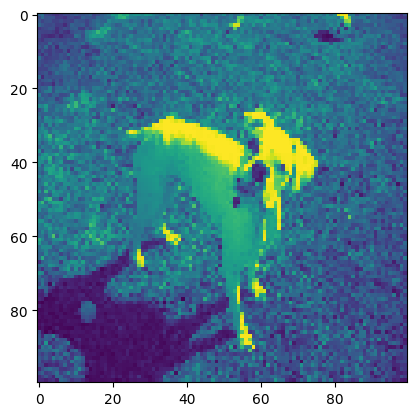

In [16]:
n = 35

print(CATEGORIES[predicted_labels[n][0]])
plt.imshow(x_test[n])
plt.show()